##Importing the Libraries

In [40]:
!pip install python_speech_features
!pip install soundfile
!pip install librosa
import os
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from keras.layers import Dropout, Dense, TimeDistributed,BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
from python_speech_features import mfcc
import pickle
from keras.callbacks import ModelCheckpoint
#from cfg import Config

In [0]:
import os
class Config:
    def __init__(self, mode="conv", nfilt=26, nfeat=13, nfft=512, rate=16000):
        self.mode=mode
        self.nfilt=nfilt
        self.nfeat=nfeat
        self.nfft=nfft
        self.rate=rate
        self.step=int(rate/10)
        self.model_path=os.path.join('models',mode +'.model')
        self.p_path=os.path.join('pickle', mode+ '.p')

##Loading and Extracting Data

In [0]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

In [0]:
!tar -xvf /content/genres.tar.gz

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

##Function for checking and loading numpy file

In [0]:
def check_data():
    if os.path.isfile(config.p_path):
        print("Loading existing data for {} model".format(config.mode))
        with open(config.p_path, 'rb') as handle:
            tmp=pickle.load(handle)
            return tmp
    else:
        return None

## CSV file for all the audio with Label

In [0]:
import os
import pandas as pd
import numpy as np
music_csv=pd.DataFrame(columns=["Audio_name","Category"])
rootdir = 'genres'


for subdir, dirs, files in os.walk(rootdir):
    if len(files)>0:
        files=np.sort(files)
        for i in files:
            tag=i.split(".")[0]
            d = {'Audio_name': i, 'Category': tag}
            music_csv=music_csv.append(d, ignore_index=True)




In [0]:
music_csv.shape

(1000, 2)

In [0]:
music_csv.set_index("Audio_name",inplace=True)

In [0]:
music_csv.head()

,Category
Audio_name,
blues.00000.au,blues
blues.00001.au,blues
blues.00002.au,blues
blues.00003.au,blues
blues.00004.au,blues


##Generating Length of audio

In [0]:
import os
import soundfile as sf
rootdir = 'genres/'

for subdir, dirs, files in os.walk(rootdir):
    if len(files)>0:
        for f in music_csv.index:
            if subdir.split("/")[-1]==f.split(".")[0]:
                print(subdir+"/"+f)
                signal,rate=sf.read(subdir+"/"+f)
                music_csv.at[f,"length"]=signal.shape[0]/rate

genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.au
genres/blues/blues.0

genres/jazz/jazz.00037.au
genres/jazz/jazz.00038.au
genres/jazz/jazz.00039.au
genres/jazz/jazz.00040.au
genres/jazz/jazz.00041.au
genres/jazz/jazz.00042.au
genres/jazz/jazz.00043.au
genres/jazz/jazz.00044.au
genres/jazz/jazz.00045.au
genres/jazz/jazz.00046.au
genres/jazz/jazz.00047.au
genres/jazz/jazz.00048.au
genres/jazz/jazz.00049.au
genres/jazz/jazz.00050.au
genres/jazz/jazz.00051.au
genres/jazz/jazz.00052.au
genres/jazz/jazz.00053.au
genres/jazz/jazz.00054.au
genres/jazz/jazz.00055.au
genres/jazz/jazz.00056.au
genres/jazz/jazz.00057.au
genres/jazz/jazz.00058.au
genres/jazz/jazz.00059.au
genres/jazz/jazz.00060.au
genres/jazz/jazz.00061.au
genres/jazz/jazz.00062.au
genres/jazz/jazz.00063.au
genres/jazz/jazz.00064.au
genres/jazz/jazz.00065.au
genres/jazz/jazz.00066.au
genres/jazz/jazz.00067.au
genres/jazz/jazz.00068.au
genres/jazz/jazz.00069.au
genres/jazz/jazz.00070.au
genres/jazz/jazz.00071.au
genres/jazz/jazz.00072.au
genres/jazz/jazz.00073.au
genres/jazz/jazz.00074.au
genres/jazz/

In [0]:
music_csv.head()

,Category,length
Audio_name,,
blues.00000.au,blues,30.013333
blues.00001.au,blues,30.013333
blues.00002.au,blues,30.013333
blues.00003.au,blues,30.013333
blues.00004.au,blues,30.013333


In [0]:
classes=list(np.unique(music_csv.Category))

In [0]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [0]:
class_dict=music_csv.groupby(["Category"])["length"].mean()

In [0]:
class_dict

Category
blues        30.013333
classical    30.027941
country      30.023935
disco        30.019719
hiphop       30.089263
jazz         30.033255
metal        30.004390
pop          30.000181
reggae       30.005574
rock         30.023156
Name: length, dtype: float64

##Checking Distribution of Labels

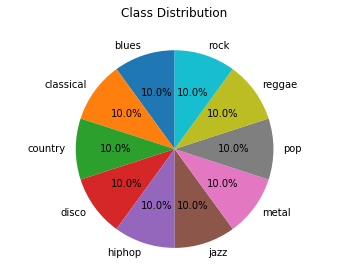

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dict, labels=class_dict.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [0]:
music_csv.head()

,Category,length
Audio_name,,
blues.00000.au,blues,30.013333
blues.00001.au,blues,30.013333
blues.00002.au,blues,30.013333
blues.00003.au,blues,30.013333
blues.00004.au,blues,30.013333


In [0]:
def calc_fft(y,rate):
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/rate)
    Y=abs(np.fft.rfft(y)/n)
    return(Y, freq)

## Function for removng noise

In [0]:
def envelope(y,rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean=y.rolling(window=int(rate/10),min_periods=1,center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)

In [0]:
class_dict

Category
blues        30.013333
classical    30.027941
country      30.023935
disco        30.019719
hiphop       30.089263
jazz         30.033255
metal        30.004390
pop          30.000181
reggae       30.005574
rock         30.023156
Name: length, dtype: float64

## Moving all files from folder and subfolders to One particular folder

In [0]:
#!rm -rf clean
#!mkdir clean
import shutil
rootdir = 'genres/'
for subdir, dirs, files in os.walk(rootdir):
    if len(files)>0:
        tag=subdir.split("/")[-1]
        files=np.sort(files)
        print(subdir)
        print()
        for i in files:
            print(subdir+"/"+i)
            shutil.move(subdir+"/"+i, "clean") 


'rm' is not recognized as an internal or external command,
operable program or batch file.


genres/blues

genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.au
genres

genres/jazz/jazz.00033.au
genres/jazz/jazz.00034.au
genres/jazz/jazz.00035.au
genres/jazz/jazz.00036.au
genres/jazz/jazz.00037.au
genres/jazz/jazz.00038.au
genres/jazz/jazz.00039.au
genres/jazz/jazz.00040.au
genres/jazz/jazz.00041.au
genres/jazz/jazz.00042.au
genres/jazz/jazz.00043.au
genres/jazz/jazz.00044.au
genres/jazz/jazz.00045.au
genres/jazz/jazz.00046.au
genres/jazz/jazz.00047.au
genres/jazz/jazz.00048.au
genres/jazz/jazz.00049.au
genres/jazz/jazz.00050.au
genres/jazz/jazz.00051.au
genres/jazz/jazz.00052.au
genres/jazz/jazz.00053.au
genres/jazz/jazz.00054.au
genres/jazz/jazz.00055.au
genres/jazz/jazz.00056.au
genres/jazz/jazz.00057.au
genres/jazz/jazz.00058.au
genres/jazz/jazz.00059.au
genres/jazz/jazz.00060.au
genres/jazz/jazz.00061.au
genres/jazz/jazz.00062.au
genres/jazz/jazz.00063.au
genres/jazz/jazz.00064.au
genres/jazz/jazz.00065.au
genres/jazz/jazz.00066.au
genres/jazz/jazz.00067.au
genres/jazz/jazz.00068.au
genres/jazz/jazz.00069.au
genres/jazz/jazz.00070.au
genres/jazz/

## Calculating the number of sample to be generated from the audios

In [0]:
n_samples=2 * int(music_csv['length'].sum())
prob_dist=class_dict / class_dict.sum()
choices=np.random.choice(class_dict.index,p=prob_dist)

In [0]:
prob_dist

Category
blues        0.099964
classical    0.100013
country      0.100000
disco        0.099985
hiphop       0.100217
jazz         0.100031
metal        0.099934
pop          0.099920
reggae       0.099938
rock         0.099997
Name: length, dtype: float64

In [0]:
n_samples

60048

## Features generation function

In [0]:
import librosa
def build_rand_feat():  
    tmp=check_data()
    if tmp:
        return tmp.data[0], tmp.data[1]
    X=[]
    y=[]
    _min, _max = float('inf'), -float('inf')
    for _ in tqdm(range(n_samples)):
        rand_class=np.random.choice(class_dict.index,p=prob_dist)
    #print(rand_class)
        file=np.random.choice(music_csv[music_csv.Category==rand_class].index)
    #print(file)
        song, rate=librosa.load('clean/'+file,sr=16000)
        label=music_csv.at[file,'Category']

        rand_index=np.random.randint(0,song.shape[0]-config.step)

        sample=song[rand_index:rand_index+config.step]
        X_sample=mfcc(sample, rate, numcep=config.nfeat, nfilt=config.nfilt, nfft=config.nfft)
        _min=min(np.amin(X_sample), _min)
        _max=max(np.amax(X_sample), _max)
        X.append(X_sample)
        y.append(classes.index(label))
    config.min=_min
    config.max=_max

    X,y=np.array(X), np.array(y)
    X=( X - _min ) / ( _max - _min )
  
    if config.mode=='conv':
        X=X.reshape( X.shape[0], X.shape[1], X.shape[2], 1)
    elif config.mode=='time':
         X=X.reshape( X.shape[0], X.shape[1], X.shape[2])
  
    y=to_categorical(y,num_classes=10)
    config.data=(X,y)
  
    with open(config.p_path, 'wb') as handle:
        pickle.dump(config,handle,protocol=2)
  
    return  X , y



## Model Architecture for Convolution and LSTM

In [0]:
def get_conv_model():
    model=Sequential()
    model.add(Conv2D(16, (3,3), activation='relu',strides=(1,1),padding='same',input_shape=input_shape))
    model.add(Conv2D(32, (3,3), activation='relu',strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu',strides=(1,1),padding='same'))
    model.add(BatchNormalization())    
    model.add(Conv2D(128, (3,3), activation='relu',strides=(1,1),padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                    optimizer='adam',
                    metrics=['acc'])
    return model
  

def get_recurrent_model():
    model=Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=input_shape))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(64,activation='relu')))
    model.add(TimeDistributed(Dense(32,activation='relu')))
    model.add(TimeDistributed(Dense(16,activation='relu')))
    model.add(TimeDistributed(Dense(8,activation='relu')))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
    return model
  

## Global layout for model selection (Conv or Lstm)

In [43]:
config=Config(mode="conv")
if config.mode == 'conv':
    X,y=build_rand_feat()
    y_flat=np.argmax(y,axis=1)
    input_shape=(X.shape[1],X.shape[2],1)
    model=get_conv_model()
elif config.mode =='time':
    X,y=build_rand_feat()
    y_flat=np.argmax(y,axis=1)
    input_shape=(X.shape[1],X.shape[2])
    model=get_recurrent_model()

Loading existing data for conv model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 9, 13, 16)         160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 13, 32)         4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 13, 32)         128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 13, 64)         18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 13, 64)         256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 13, 128)        73856     
_________________________________________________________________
max_pooling2d_5 

In [44]:
X.shape,y.shape

((60048, 9, 13, 1), (60048, 10))

## Splitting the Data

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((54043, 9, 13, 1), (6005, 9, 13, 1), (54043, 10), (6005, 10))

In [0]:
checkpoint= ModelCheckpoint(config.model_path, monitor= 'val_acc', verbose=1, mode='max', save_best_only=True, save_weights_only=False,period=1)

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 9, 13, 16)         160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 13, 32)         4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 13, 32)         128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 13, 64)         18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 13, 64)         256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 13, 128)        73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 6, 128)        

## Model Training

In [55]:
model.fit(x_train,y_train,epochs=100,batch_size=128,shuffle=True,validation_data=[x_test,y_test])

Train on 54043 samples, validate on 6005 samples
Epoch 1/100
54043/54043 [==============================] - 5s 99us/step - loss: 1.8318 - acc: 0.3522 - val_loss: 2.6409 - val_acc: 0.2211
Epoch 2/100
54043/54043 [==============================] - 4s 69us/step - loss: 1.6333 - acc: 0.4236 - val_loss: 1.9732 - val_acc: 0.3312
Epoch 3/100
54043/54043 [==============================] - 4s 68us/step - loss: 1.5671 - acc: 0.4478 - val_loss: 1.7713 - val_acc: 0.3823
Epoch 4/100
54043/54043 [==============================] - 4s 70us/step - loss: 1.5199 - acc: 0.4659 - val_loss: 1.5386 - val_acc: 0.4618
Epoch 5/100
54043/54043 [==============================] - 4s 72us/step - loss: 1.4807 - acc: 0.4792 - val_loss: 1.4844 - val_acc: 0.4798
Epoch 6/100
54043/54043 [==============================] - 4s 70us/step - loss: 1.4455 - acc: 0.4900 - val_loss: 1.9258 - val_acc: 0.3554
Epoch 7/100
54043/54043 [==============================] - 4s 69us/step - loss: 1.4113 - acc: 0.5038 - val_loss: 1.4670 - v

In [56]:
model.fit(X,y,epochs=100,batch_size=256,shuffle=True,validation_split=0.1,callbacks=[checkpoint])

Train on 54043 samples, validate on 6005 samples
Epoch 1/100
54043/54043 [==============================] - 2s 42us/step - loss: 0.5652 - acc: 0.8243 - val_loss: 0.2824 - val_acc: 0.9364

Epoch 00001: val_acc improved from -inf to 0.93639, saving model to models/conv.model
Epoch 2/100
54043/54043 [==============================] - 2s 43us/step - loss: 0.5300 - acc: 0.8302 - val_loss: 0.3672 - val_acc: 0.9022

Epoch 00002: val_acc did not improve from 0.93639
Epoch 3/100
54043/54043 [==============================] - 2s 42us/step - loss: 0.5149 - acc: 0.8348 - val_loss: 0.2807 - val_acc: 0.9435

Epoch 00003: val_acc improved from 0.93639 to 0.94355, saving model to models/conv.model
Epoch 4/100
54043/54043 [==============================] - 2s 42us/step - loss: 0.5059 - acc: 0.8348 - val_loss: 0.3546 - val_acc: 0.9076

Epoch 00004: val_acc did not improve from 0.94355
Epoch 5/100
54043/54043 [==============================] - 2s 42us/step - loss: 0.4941 - acc: 0.8369 - val_loss: 0.3084 

In [0]:
model.save(config.model_path)

## Evaluation

In [66]:
loss_test, acc_test=model.evaluate(x_test,y_test)

6005/6005 [==============================] - 0s 60us/step


In [67]:
loss_test,acc_test

(0.24428199373315912, 0.9513738551306585)